In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import sys

from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import time


plt.rcParams["figure.figsize"] = (9, 6)
warnings.simplefilter("ignore")

sys.path.append("../1_Format_donnees/")
from aggregation import load_and_preprocess_raw_data, Scaler_Metrics
sys.path.append("../")

from evaluate import plot_confusion_matrix, get_scores, plot_feature_importance

### <8 mbits en cumsum = bruit 

In [2]:
WINDOW_SIZE = 250


In [3]:
time_counter = time.time_ns()

df_test = load_and_preprocess_raw_data("../Mesures/test", window_size = WINDOW_SIZE)
df_train = load_and_preprocess_raw_data("../Mesures/train", window_size = WINDOW_SIZE)

process_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Dataset generation took : {process_duration} s")

Load datasets...
Extracting ../Mesures/test\messenger20221124_151137.csv.... 1/7


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 18.20it/s]


Extracting ../Mesures/test\messenger20230208_132747.csv.... 2/7


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:03<00:00,  7.58it/s]


Extracting ../Mesures/test\skype20221206_150902.csv.... 3/7


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.38it/s]


Extracting ../Mesures/test\spotify20230127_134348.csv.... 4/7


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1098.64it/s]


Extracting ../Mesures/test\twitch20221124_163054.csv.... 5/7


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 23.05it/s]


Extracting ../Mesures/test\youtube20221118_104205.csv.... 6/7


100%|██████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 1071.01it/s]


Extracting ../Mesures/test\youtube20230117_121925.csv.... 7/7


100%|█████████████████████████████████████████████████████████████████████████████| 765/765 [00:00<00:00, 20851.32it/s]


Load datasets...
Extracting ../Mesures/train\messenger20221117_125310.csv.... 1/39


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 125.74it/s]


Extracting ../Mesures/train\messenger20221124_143112.csv.... 2/39


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 40.29it/s]


Extracting ../Mesures/train\messenger20221125_130559.csv.... 3/39


100%|█████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 110.25it/s]


Extracting ../Mesures/train\messenger20221129_131204.csv.... 4/39


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 12.96it/s]


Extracting ../Mesures/train\messenger20221129_151124.csv.... 5/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.62it/s]


Extracting ../Mesures/train\messenger20230207_133921.csv.... 6/39


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.64it/s]


Extracting ../Mesures/train\messenger20230209_083453.csv.... 7/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.57it/s]


Extracting ../Mesures/train\pure_noise20230106_132210.csv.... 8/39


100%|██████████████████████████████████████████████████████████████████████████████| 805/805 [00:00<00:00, 1411.58it/s]


Extracting ../Mesures/train\skype20221129_164105.csv.... 9/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 13.65it/s]


Extracting ../Mesures/train\skype20221206_125510.csv.... 10/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 36.32it/s]


Extracting ../Mesures/train\skype20221208_104403.csv.... 11/39


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.63it/s]


Extracting ../Mesures/train\skype20221208_124925.csv.... 12/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.15it/s]


Extracting ../Mesures/train\skype20221215_151512.csv.... 13/39


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 50.20it/s]


Extracting ../Mesures/train\skype20221215_155618.csv.... 14/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 27.11it/s]


Extracting ../Mesures/train\skype20221215_164208.csv.... 15/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.40it/s]


Extracting ../Mesures/train\skype20221215_174819.csv.... 16/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.09it/s]


Extracting ../Mesures/train\spotify20230201_092702.csv.... 17/39


100%|█████████████████████████████████████████████████████████████████████████████| 1750/1750 [00:05<00:00, 309.21it/s]


Extracting ../Mesures/train\spotify20230203_165507.csv.... 18/39


100%|██████████████████████████████████████████████████████████████████████████████| 522/522 [00:00<00:00, 1422.27it/s]


Extracting ../Mesures/train\spotify20230216_141318.csv.... 19/39


100%|██████████████████████████████████████████████████████████████████████████████| 364/364 [00:00<00:00, 1525.18it/s]


Extracting ../Mesures/train\twitch20221117_113554.csv.... 20/39


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 109.86it/s]


Extracting ../Mesures/train\twitch20221118_075454.csv.... 21/39


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 53.52it/s]


Extracting ../Mesures/train\twitch20221125_133859.csv.... 22/39


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 88.40it/s]


Extracting ../Mesures/train\twitch20230110_110215.csv.... 23/39


100%|█████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 122.78it/s]


Extracting ../Mesures/train\twitch20230110_120513.csv.... 24/39


100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 345.88it/s]


Extracting ../Mesures/train\twitch20230110_130648.csv.... 25/39


100%|███████████████████████████████████████████████████████████████████████████████| 426/426 [00:00<00:00, 849.28it/s]


Extracting ../Mesures/train\youtube20221108_165214.csv.... 26/39


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 517.17it/s]


Extracting ../Mesures/train\youtube20221108_182416.csv.... 27/39


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 308.51it/s]


Extracting ../Mesures/train\youtube20221124_125524.csv.... 28/39


100%|██████████████████████████████████████████████████████████████████████████████| 186/186 [00:00<00:00, 1018.19it/s]


Extracting ../Mesures/train\youtube20221124_154037.csv.... 29/39


100%|█████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 719.67it/s]


Extracting ../Mesures/train\youtube20221130_103723.csv.... 30/39


100%|████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 1216.06it/s]


Extracting ../Mesures/train\youtube20230110_145404.csv.... 31/39


100%|█████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 631.50it/s]


Extracting ../Mesures/train\youtube20230110_161955.csv.... 32/39


100%|████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 1223.19it/s]


Extracting ../Mesures/train\youtube20230112_125508.csv.... 33/39


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 654.50it/s]


Extracting ../Mesures/train\youtube20230112_151029.csv.... 34/39


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 855.19it/s]


Extracting ../Mesures/train\youtube20230112_154749.csv.... 35/39


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 630.17it/s]


Extracting ../Mesures/train\youtube20230112_163634.csv.... 36/39


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 930.94it/s]


Extracting ../Mesures/train\youtube20230117_095221.csv.... 37/39


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 352.49it/s]


Extracting ../Mesures/train\youtube20230118_134041.csv.... 38/39


100%|███████████████████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 261.48it/s]


Extracting ../Mesures/train\youtube20230124_124323.csv.... 39/39


100%|███████████████████████████████████████████████████████████████████████████| 5593/5593 [00:00<00:00, 48025.53it/s]


Dataset generation took : 232.5620278 s


In [8]:
scaler = Scaler_Metrics()
training_data = scaler.fit_transform(df_train)
testing_data = scaler.transform(df_test)
training_data

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,label
id,,,,,,,,,,,,,,,,,,,,,
20221117_125310_4,0.521219,-0.054995,-0.119632,-0.052015,-0.061318,-0.065262,-0.213283,-0.177609,-0.252220,-0.420587,...,-0.068921,-0.085961,-0.100195,-0.077017,-0.104888,-0.104117,-0.092133,-0.069486,-0.0937,messenger
20221117_125310_8,-0.185148,-0.076938,0.023182,0.034436,0.087401,0.062045,-0.104631,0.294986,-0.096578,-0.323980,...,-0.068921,-0.085961,-0.100195,-0.077017,-0.104888,-0.104117,-0.092133,-0.069486,-0.0937,messenger
20221117_125310_7,-0.298167,-0.054995,0.023182,0.034436,0.087401,0.062045,-0.104631,-0.042991,-0.141047,-0.323980,...,-0.068921,-0.085961,-0.100195,-0.077017,-0.104888,-0.104117,-0.092133,-0.069486,-0.0937,messenger
20221117_125310_9,-0.185148,-0.076938,0.023182,0.250565,0.087401,0.062045,-0.104631,-0.042991,-0.148459,-0.323980,...,-0.068921,-0.085961,-0.100195,-0.077017,-0.104888,-0.104117,-0.092133,-0.069486,-0.0937,messenger
20221117_125310_10,-0.072130,0.241233,0.023182,0.034436,0.087401,0.062045,-0.104631,-0.226301,-0.148459,-0.323980,...,-0.068921,-0.085961,-0.100195,-0.077017,-0.104888,-0.104117,-0.092133,-0.069486,-0.0937,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_162,-0.185148,-0.076938,-0.098362,-0.175518,-0.140424,-0.132979,-0.236566,-0.177609,-0.141047,-0.420587,...,-0.068921,-0.085961,-0.100195,-0.077017,-0.104888,-0.104117,-0.092133,-0.069486,-0.0937,youtube
20230124_124323_163,-0.072130,-0.076938,-0.098362,-0.089066,-0.140424,-0.132979,-0.205522,-0.177609,-0.141047,-0.420587,...,-0.068921,-0.085961,-0.100195,-0.077017,-0.104888,-0.104117,-0.092133,-0.069486,-0.0937,youtube
20230124_124323_164,-0.185148,-0.076938,-0.098362,-0.089066,-0.140424,-0.132979,-0.236566,-0.177609,-0.096578,-0.420587,...,-0.068921,-0.085961,-0.100195,-0.077017,-0.104888,-0.104117,-0.092133,-0.069486,-0.0937,youtube


In [9]:
training_data = training_data[training_data .label!="noise"]
testing_data = testing_data[testing_data .label!="noise"]

In [10]:
time_counter = time.time_ns()

model = RandomForestClassifier(class_weight = "balanced")
model.fit(training_data[training_data.columns[:-1]], training_data.label)

training_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Training Duration : {training_duration} s for a dataset length of {len(training_data.label)}")

Training Duration : 1.4988842 s for a dataset length of 1284


In [11]:
# mesure efficiency
time_counter = time.time_ns()

preds_labels =  model.predict(testing_data[testing_data.columns[:-1]])
true_labels = testing_data.label

testing_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Testing Duration : {testing_duration} s for a dataset length of {len(testing_data.label)}")
testing_duration_per_item = testing_duration*(10**3)/len(testing_data.label)
print(f"Testing Duration per data : {testing_duration_per_item} ms")

Testing Duration : 0.1109108 s for a dataset length of 452
Testing Duration per data : 0.24537787610619471 ms


normalized confusion matrix


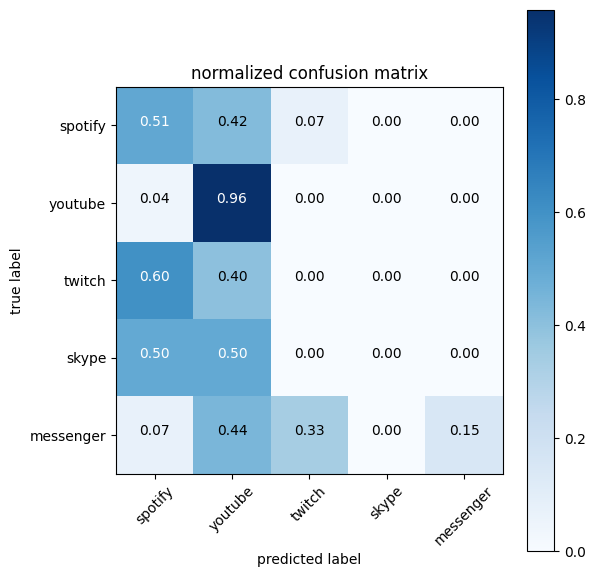

In [12]:
plot_confusion_matrix(true_labels,preds_labels)

In [13]:
get_scores(true_labels,preds_labels)

{'Accuracy': 0.3230737662870627,
 'Precision': 0.8506441788300195,
 'Recall': 0.838495575221239,
 'F1_Score': 0.8246317940374799,
 'support': None}

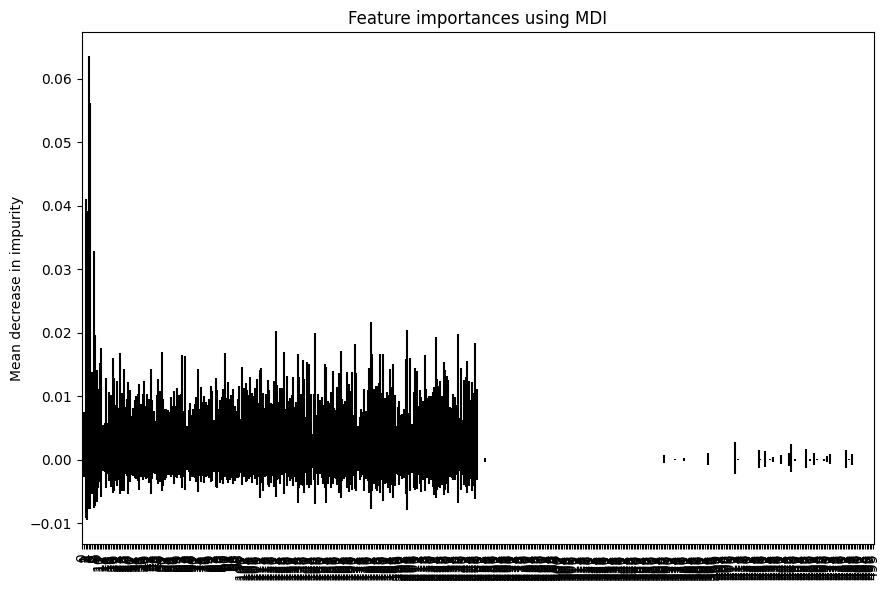

In [14]:

    
plot_feature_importance(model, training_data.columns[:-1])